# BIG DATA ANALYTICS - Project - GROUP B

## Group Members

| Student Name | Student ID |
|----------|----------|
| Allyssa Sampath    | 816032362     |
| Avinash Roopnarine    | 816029635     |
| Jared Heeralal    | 816030252     |
| Kimberly Moses   | 816031494     |


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sys
from joblib import dump, load
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, silhouette_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
import sys
sys.path.insert(0, '../DataPreprocessing')
from data_cleaning import *

In [61]:
df = pd.read_excel('../Dataset/HR_Employee_Data.xlsx')

df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


In [63]:
print(df['left'].value_counts())

0    11428
1     3571
Name: left, dtype: int64


#Cleaning

In [64]:
import sys
sys.path.insert(0, '../DataPreprocessing')
from data_cleaning import *
original_df = df
df = df.drop(['Emp_Id'], axis=1)

#One hot encode Department and salary
df = one_hot_encode(df)
new_df = df

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   Department_IT           14999 non-null  uint8  
 9   Department_RandD        14999 non-null  uint8  
 10  Department_accounting   14999 non-null  uint8  
 11  Department_hr           14999 non-null  uint8  
 12  Department_management   14999 non-null  uint8  
 13  Department_marketing    14999 non-null  uint8  
 14  Department_product_mng  14999 non-null

In [66]:
# Assuming 'df' is your DataFrame
y = df['time_spend_company']  # Target variable for regression
X = df.drop(columns=['time_spend_company', 'left'])  # Features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the models
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
gbm_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# Extract feature importances or coefficients
features = X_train.columns
rf_results = pd.DataFrame({'Feature': features, 'Importance_RF': rf_regressor.feature_importances_}).sort_values(by='Importance_RF', ascending=False)
gbm_results = pd.DataFrame({'Feature': features, 'Importance_GBM': gbm_regressor.feature_importances_}).sort_values(by='Importance_GBM', ascending=False)
linear_results = pd.DataFrame({'Feature': features, 'Coefficient_Linear': linear_reg.coef_}).sort_values(by='Coefficient_Linear', ascending=False, key=lambda col: abs(col))

# Print the sorted results
print("Random Forest Feature Importances (Higher = More Important for Longer Tenure):")
print(rf_results)
print("\nGradient Boosting Feature Importances (Higher = More Important for Longer Tenure):")
print(gbm_results)
print("\nLinear Regression Coefficients (Higher Absolute Value = More Important, Positive = Longer Tenure):")
print(linear_results)


Random Forest Feature Importances (Higher = More Important for Longer Tenure):
                   Feature  Importance_RF
0       satisfaction_level       0.254485
3     average_montly_hours       0.250691
1          last_evaluation       0.188767
2           number_project       0.078392
4            Work_accident       0.029060
10   Department_management       0.024125
16             salary_high       0.020279
13        Department_sales       0.019770
18           salary_medium       0.018172
17              salary_low       0.017209
5    promotion_last_5years       0.014266
14      Department_support       0.013829
11    Department_marketing       0.013197
6            Department_IT       0.012828
15    Department_technical       0.011989
8    Department_accounting       0.010165
12  Department_product_mng       0.009657
7         Department_RandD       0.007063
9            Department_hr       0.006055

Gradient Boosting Feature Importances (Higher = More Important for Longer Tenure

In [67]:
# df is cleaned dataset
left_df = df[df['left'] == 1].copy()  # Filter for employees who have left and create a copy

# Split the dataset into features (X) and target variable (y)
X = left_df.drop(columns=['time_spend_company'])
y = left_df['time_spend_company']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize LassoCV model
lasso = LassoCV(cv=5, random_state=42)

# Fit the model
lasso.fit(X_scaled, y)

# Get the feature importance
importance = np.abs(lasso.coef_)

# Get the indices of the important features
top4 = importance.argsort()[-5]
threshold = importance[top4] + 0.01
# idx_third = importance.argsort()[-3]
# threshold = importance[idx_third] + 0.01

# Create a mask for the important features
mask = importance > threshold

# Create a DataFrame from the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Apply the mask to X_scaled_df instead of X_train
X_train_masked = X_scaled_df.loc[:, mask]

# Print the selected features
print("Selected features:")
print(X_train_masked.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_masked, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest Regression': {'model': RandomForestRegressor(random_state=42), 'params': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}},
    'Gradient Boosting Regression': {'model': GradientBoostingRegressor(random_state=42), 'params': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 8]}},
    'Neural Network Regression': {'model': MLPRegressor(max_iter=2000,random_state=42), 'params': {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05]}},
    'Support Vector Regression': {'model': SVR(), 'params': {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear']}}
}

# Dictionary to hold predictions and metrics
predictions = {}
metrics = {}

# Specify the metrics to cross-validate
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

# Train and predict with each model
for name, model in models.items():
    # Perform hyperparameter tuning
    grid_search = GridSearchCV(model['model'], model['params'], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    
    # Fit the model on the training data with the best parameters
    model['model'].set_params(**grid_search.best_params_)
    model['model'].fit(X_train, y_train)
    
    # Perform cross-validation with the best parameters and multiple metrics
    scores = cross_validate(model['model'], X_train, y_train, cv=5, scoring=scoring)
    
    # Predict on the test data
    y_pred = model['model'].predict(X_test)
    
    # Calculate RMSE, MAE, and R-squared for the test data
    rmse_test = mean_squared_error(y_test, y_pred, squared=False)
    mae_test = mean_absolute_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    
    # Store the metrics in the dictionary
    metrics[name] = {'Cross-validated RMSE': np.sqrt(-scores['test_neg_mean_squared_error']).mean(), 
                     'Cross-validated MAE': -scores['test_neg_mean_absolute_error'].mean(), 
                     'Cross-validated R-squared': scores['test_r2'].mean(), 
                     'Test data RMSE': rmse_test, 
                     'Test data MAE': mae_test, 
                     'Test data R-squared': r2_test}
    
    # Print the metrics
    print(f"{name} - Cross-validated RMSE: {np.sqrt(-scores['test_neg_mean_squared_error']).mean()}, Cross-validated MAE: {-scores['test_neg_mean_absolute_error'].mean()}, Cross-validated R-squared: {scores['test_r2'].mean()}, Test data RMSE: {rmse_test}, Test data MAE: {mae_test}, Test data R-squared: {r2_test}")
    
    # Store the predictions on the test data
    predictions[name] = y_pred

# Print the metrics dictionary
print(metrics)


Selected features:
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours'],
      dtype='object')
Best parameters for Random Forest Regression: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Regression - Cross-validated RMSE: 0.31979739257156165, Cross-validated MAE: 0.1333643224478382, Cross-validated R-squared: 0.8925665971628935, Test data RMSE: 0.3457115110230822, Test data MAE: 0.14055534667352848, Test data R-squared: 0.8742683534546152
Best parameters for Gradient Boosting Regression: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}
Gradient Boosting Regression - Cross-validated RMSE: 0.32448844201722415, Cross-validated MAE: 0.11402120769821456, Cross-validated R-squared: 0.8885581626657728, Test data RMSE: 0.3670128803167981, Test data MAE: 0.12877889694075467, Test data R-squared: 0.8582968402175091
Best parameters for Neural Network Regression: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_

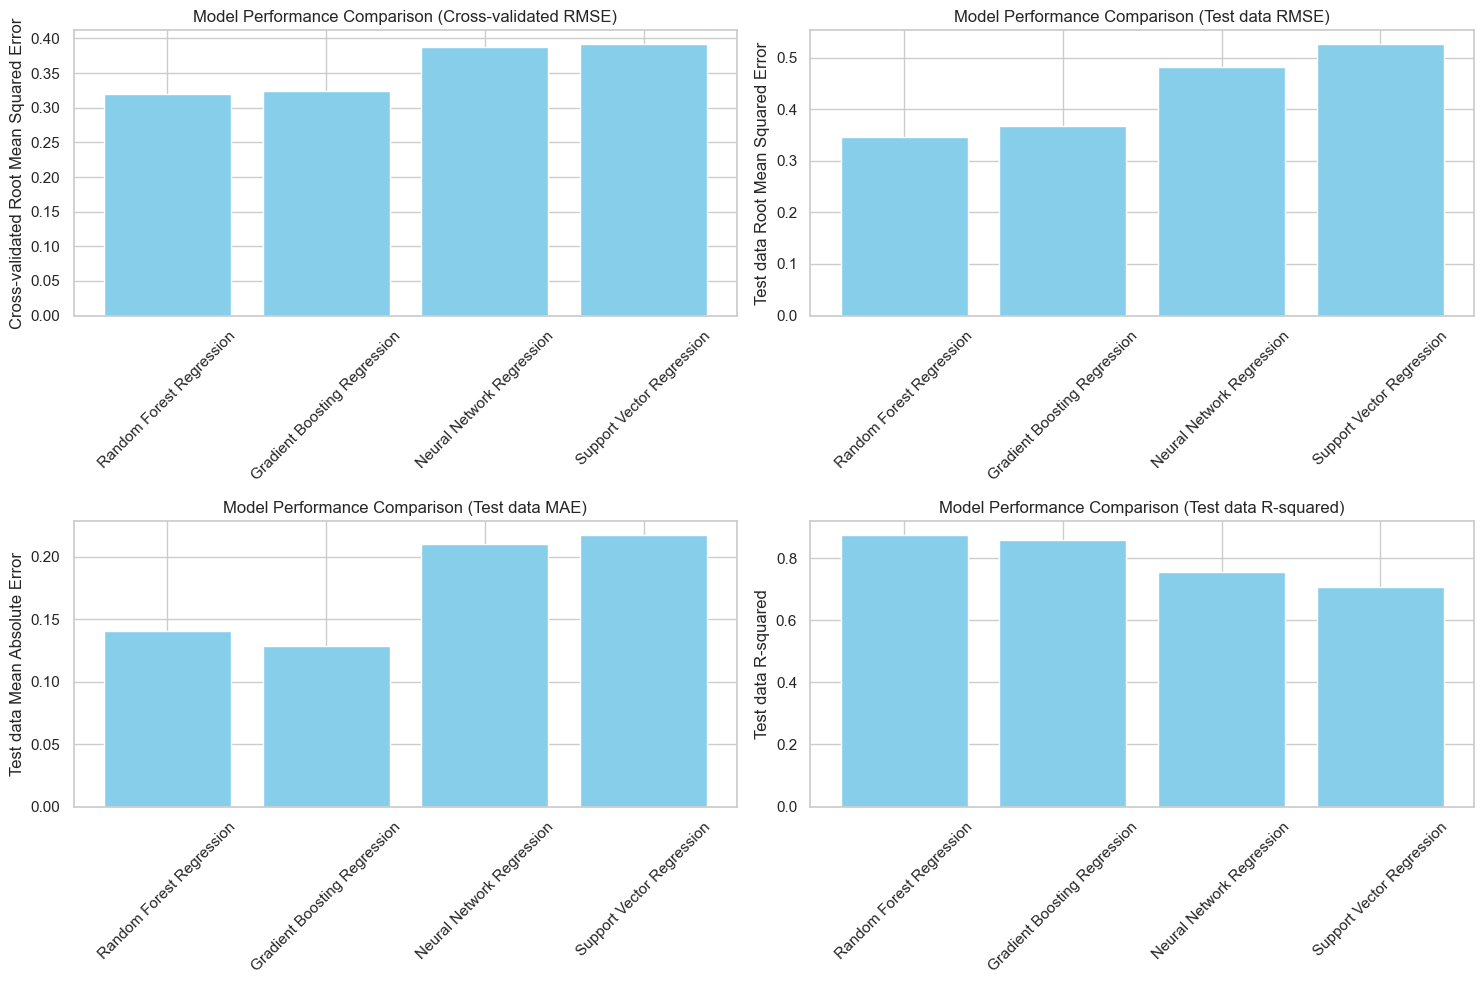

In [68]:
# Extract the metric values for each model
cv_rmse_values = {name: values['Cross-validated RMSE'] for name, values in metrics.items()}
test_rmse_values = {name: values['Test data RMSE'] for name, values in metrics.items()}
test_mae_values = {name: values['Test data MAE'] for name, values in metrics.items()}
test_r2_values = {name: values['Test data R-squared'] for name, values in metrics.items()}

fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Function to create a bar chart for a given metric
def plot_metric(ax, values, title, ylabel):
    ax.bar(values.keys(), values.values(), color='skyblue')
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', rotation=45)

# Create a bar chart for each metric
plot_metric(axs[0, 0], cv_rmse_values, 'Model Performance Comparison (Cross-validated RMSE)', 'Cross-validated Root Mean Squared Error')
plot_metric(axs[0, 1], test_rmse_values, 'Model Performance Comparison (Test data RMSE)', 'Test data Root Mean Squared Error')
plot_metric(axs[1, 0], test_mae_values, 'Model Performance Comparison (Test data MAE)', 'Test data Mean Absolute Error')
plot_metric(axs[1, 1], test_r2_values, 'Model Performance Comparison (Test data R-squared)', 'Test data R-squared')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


In [69]:
# print(original_df)
# Assume 'best_model' is the model you've selected
best_model = models['Gradient Boosting Regression']['model']

# Save the model as a joblib file
dump(best_model, '../Models/best_model.joblib')

# To load the model later
loaded_model = load('../Models/best_model.joblib')

# Save the 'Emp_Id' column
emp_ids = original_df['Emp_Id']

# Select only 'satisfaction_level' and 'number_project' columns
new_X = new_df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours']]

new_predictions = loaded_model.predict(new_X)

# Create a DataFrame with 'Emp_Id' and the corresponding predictions
results_df = pd.DataFrame({
    'Emp_Id': emp_ids,
    'Prediction': new_predictions
})

print(results_df)


         Emp_Id  Prediction
0      IND02438    2.978095
1      IND28133    2.606496
2      IND07164    3.717145
3      IND30478    3.696136
4      IND24003    2.978095
...         ...         ...
14994  IND40221    3.216837
14995  IND24196    2.972434
14996  IND33544    2.978095
14997  IND40533    3.666112
14998  IND11649    2.978095

[14999 rows x 2 columns]


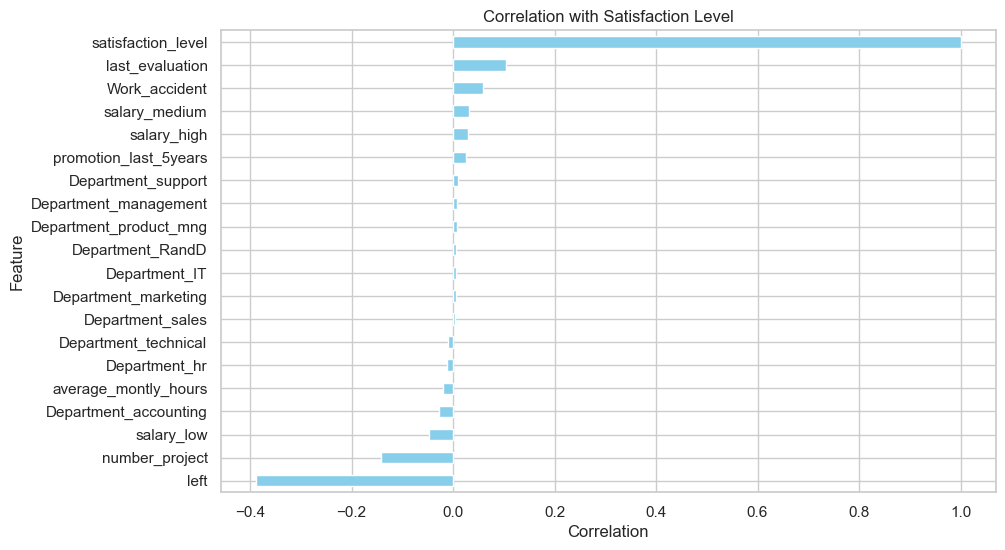

Correlations with satisfaction_level:
left                     -0.388375
number_project           -0.142970
salary_low               -0.047415
Department_accounting    -0.028649
average_montly_hours     -0.020048
Department_hr            -0.012841
Department_technical     -0.009345
Department_sales          0.004007
Department_marketing      0.005715
Department_IT             0.006373
Department_RandD          0.006615
Department_product_mng    0.006919
Department_management     0.007172
Department_support        0.009185
promotion_last_5years     0.025605
salary_high               0.029708
salary_medium             0.031367
Work_accident             0.058697
last_evaluation           0.105021
satisfaction_level        1.000000
Name: satisfaction_level, dtype: float64


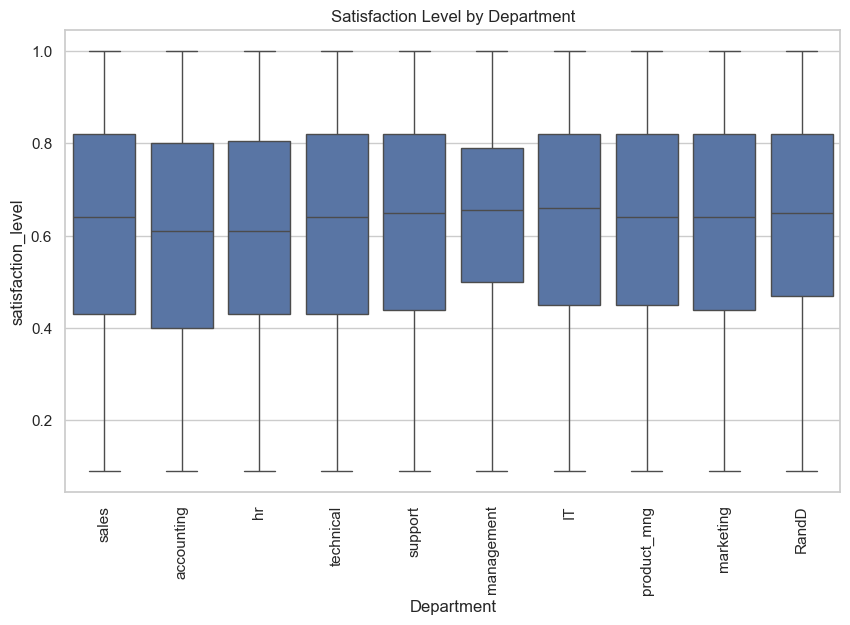

Mean satisfaction_level for employees who left vs stayed:
left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

Mean satisfaction_level by department:
Department
IT             0.618142
RandD          0.619822
accounting     0.582151
hr             0.598809
management     0.621349
marketing      0.618601
product_mng    0.619634
sales          0.614447
support        0.618300
technical      0.607897
Name: satisfaction_level, dtype: float64
ANOVA test for mean satisfaction levels across departments: F =  2.1584321691809847 , P =  0.021865375192711502


In [77]:
df = pd.read_excel('../Dataset/HR_Employee_Data.xlsx')

# Import necessary libraries
from joblib import dump, load
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Save the 'Emp_Id' column
emp_ids = df['Emp_Id']

# Drop 'Emp_Id' from the DataFrame
df = df.drop(columns=['Emp_Id', 'time_spend_company'])

# One-hot encoding with prefix
# df_encoded = pd.get_dummies(df, columns=['Department', 'salary'], prefix=['Dept', 'Sal'])
df_encoded = one_hot_encode(df)

# Calculate correlations
correlations = df_encoded.corr()['satisfaction_level'].sort_values()

# Bar Chart
plt.figure(figsize=(10, 6))
correlations.plot(kind='barh', color='skyblue')
plt.title('Correlation with Satisfaction Level')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()

# Print the correlations
print("Correlations with satisfaction_level:")
print(correlations)

# Create a box plot of satisfaction_level by department
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='satisfaction_level', data=df)
plt.xticks(rotation=90)
plt.title('Satisfaction Level by Department')
plt.show()

# Calculate mean satisfaction_level for different groups
mean_satisfaction_by_left = df.groupby('left')['satisfaction_level'].mean()
mean_satisfaction_by_department = df.groupby('Department')['satisfaction_level'].mean()

print("Mean satisfaction_level for employees who left vs stayed:")
print(mean_satisfaction_by_left)
print("\nMean satisfaction_level by department:")
print(mean_satisfaction_by_department)

department_columns = [col for col in df_encoded.columns if 'Department_' in col]

# Prepare the data for ANOVA
anova_data = [df_encoded[df_encoded[dept_col] == 1]['satisfaction_level'] for dept_col in department_columns]

# Perform an ANOVA test
fvalue, pvalue = stats.f_oneway(*anova_data)

print("ANOVA test for mean satisfaction levels across departments: F = ", fvalue, ", P = ", pvalue)

# Feature Importance from Model
importance = best_model.feature_importances_

In [72]:
df = pd.read_excel('../Dataset/HR_Employee_Data.xlsx')
emp_ids = df['Emp_Id']
# Find the name of the model with the highest R-squared value on the test data
best_model_name = max(metrics, key=lambda x: metrics[x]['Test data R-squared'])

# Get the best model
best_model = models[best_model_name]['model']

print(f"The best model is {best_model_name} with a test R-squared of {metrics[best_model_name]['Test data R-squared']}")

# Now you can use 'best_model' for predictions
preds = (best_model.predict(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours']]))

res = pd.DataFrame({
    'Emp_Id': emp_ids,
    'Prediction': preds
})

# print(res)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'time_spend_company' is the actual target value
actual = df['time_spend_company']

mse = mean_squared_error(actual, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual, preds)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


The best model is Random Forest Regression with a test R-squared of 0.8742683534546152
Mean Squared Error (MSE): 2.268405580372025
Root Mean Squared Error (RMSE): 1.50612269764851
Mean Absolute Error (MAE): 1.0592446163077538


In [73]:
import pandas as pd

# Ensure that the dataframes are aligned (i.e., have the same shape and index)
df1 = results_df
df2 = res
assert df1.shape == df2.shape, "Dataframes must be the same shape"
assert (df1.index == df2.index).all(), "Dataframes must have the same index"

# Calculate the differences
differences = df1['Prediction'] - df2['Prediction']

# Create a new dataframe with the differences
df_diff = pd.DataFrame(differences, columns=['Difference'])

# Extract the 'time_spend_company' column from your data
actual = df['time_spend_company']

# Calculate the prediction errors
errors1 = df1['Prediction'] - actual
errors2 = df2['Prediction'] - actual

# Compare the errors
print('Mean prediction error for Gradient Boosting:', errors1.abs().mean())
print('Mean prediction error for Random Forest:', errors2.abs().mean())


Mean prediction error for Gradient Boosting: 1.274284495736213
Mean prediction error for Random Forest: 1.0592446163077538
